# Plate 6

## Preprocessing

In [1]:
import pandas as pd
import numpy as np

def convert_time(time):
    '''Converts the data format into seconds'''
    h,m,s = (time.hour,time.minute,time.second)
    return (int(h) * 3600 + int(m) * 60 + int(s))/3600


def get_dataframe_from_xlsx(path):
    df = pd.read_excel(path,header=None)

    df_list = np.split(df, df[df.isnull().all(1)].index)
    df_list_new = []
    for i in range(len(df_list)):
        df = df_list[i]
        df.columns = df.iloc[0 if i == 0 else 1] #set header
        df = df.iloc[1 if i == 0 else 2:] #delete first row (header)
        df = df.set_index('Kinetic read') #set index
        df.index = df.index.map(convert_time) #convert datetime.time into seconds
        df = df[df.columns.dropna()] #remove empty columns
        df = df.dropna() #remove all empty lines
        df_list_new.append(df)
    return pd.concat(df_list_new,axis=1)

df = get_dataframe_from_xlsx('../data/202000809_iGEM2020-KO-Fitness-plate6.xlsx')
df.head()

,A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,...,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
Kinetic read,,,,,,,,,,,,,,,,,,,,,
0.072778,0.112,0.112,0.11,0.112,0.108,0.113,0.11,0.108,0.114,0.115,...,0.113,0.112,0.112,0.112,0.107,0.115,0.081,0.081,0.105,0.105
0.156111,0.111,0.111,0.109,0.111,0.108,0.112,0.109,0.108,0.112,0.114,...,0.111,0.11,0.111,0.111,0.107,0.113,0.081,0.081,0.105,0.105
0.239444,0.111,0.111,0.108,0.11,0.107,0.112,0.109,0.108,0.111,0.113,...,0.111,0.11,0.111,0.11,0.106,0.112,0.081,0.081,0.105,0.105
0.322778,0.111,0.111,0.108,0.11,0.107,0.111,0.109,0.108,0.111,0.113,...,0.111,0.11,0.11,0.11,0.106,0.112,0.081,0.083,0.105,0.104
0.406111,0.111,0.111,0.108,0.11,0.107,0.112,0.109,0.108,0.111,0.113,...,0.111,0.11,0.11,0.11,0.106,0.112,0.081,0.082,0.105,0.104


## Plots

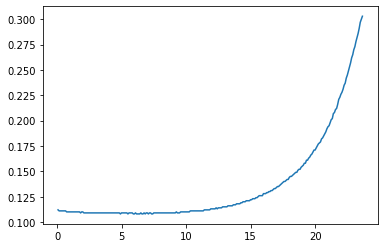

In [6]:
import matplotlib.pyplot as plt
plt.plot(df['A1'])
plt.show()

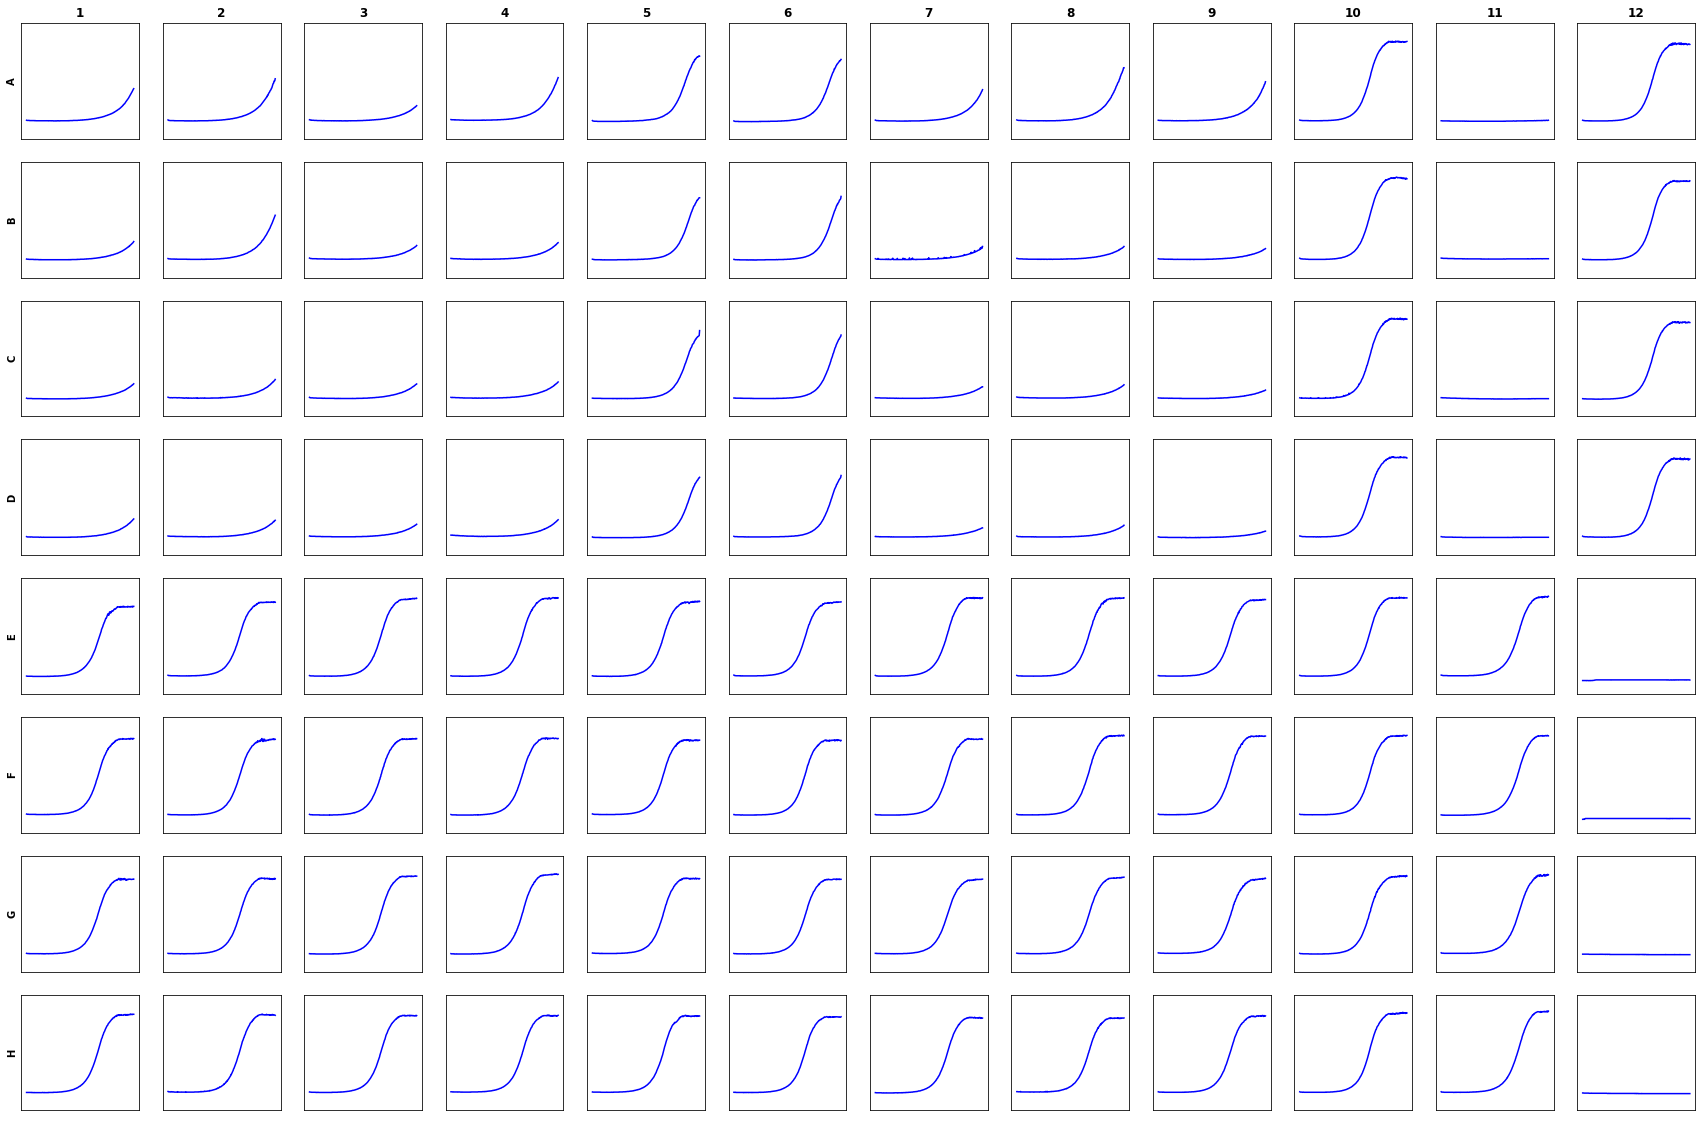

In [7]:
import matplotlib.pyplot as plt
import string

alph = string.ascii_uppercase
fig, axs = plt.subplots(8, 12)
fig.set_figheight(20)
fig.set_figwidth(30)
for i in range(8):
    axs[i,0].set_ylabel(alph[i],fontweight='bold')
    for j in range(12):
        plt.sca(axs[i,j])
        if(i==0):
            plt.title(j+1,fontweight='bold')
        y = df[alph[i]+str(j+1)]
        plt.plot(y,'b')
        plt.xticks([])
        plt.yticks([])
        axs[i,j].set_ylim([0, 0.7])
plt.show()

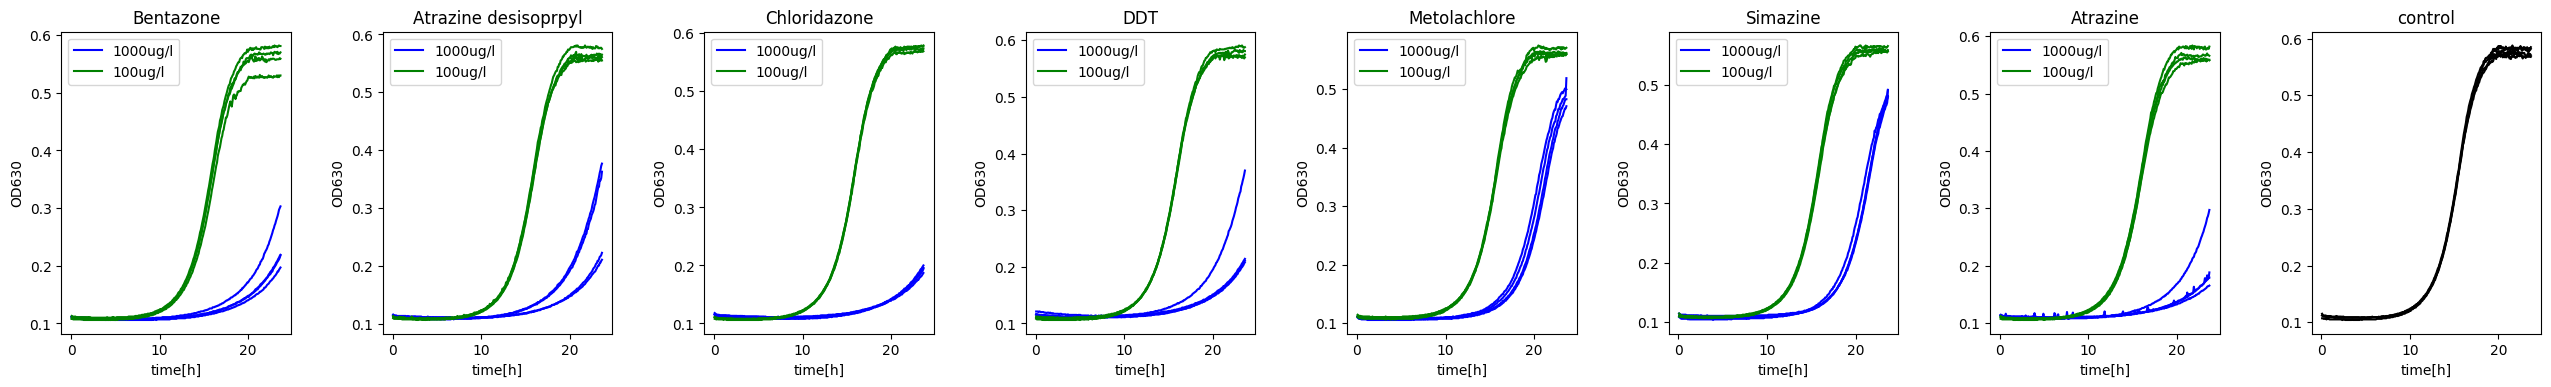

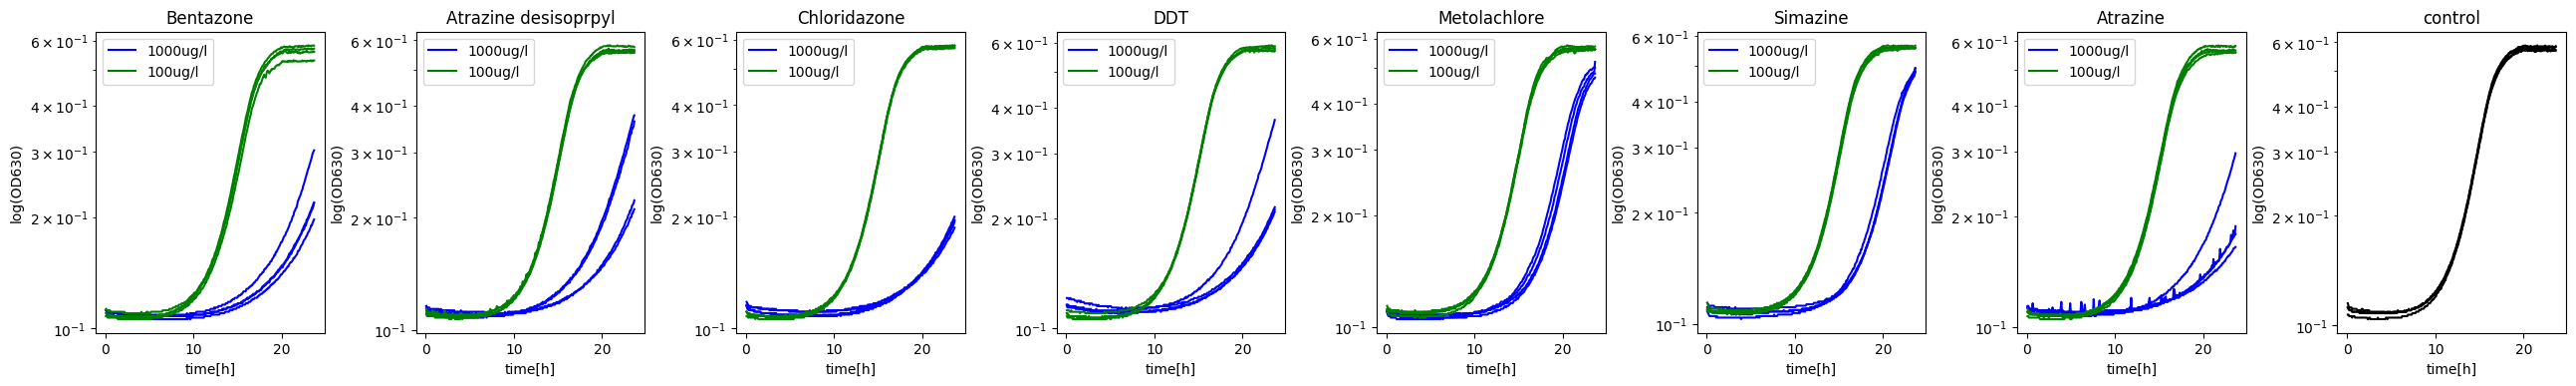

In [8]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
import matplotlib.pyplot as plt
import string

alph = string.ascii_uppercase
pesticides = ['Bentazone','Atrazine desisoprpyl','Chloridazone','DDT','Metolachlore','Simazine','Atrazine']
control = ['A12','B12','C12','D12']
fig, axs = plt.subplots(1,len(pesticides)+1)
fig.set_figheight(4)
fig.set_figwidth(32)
for k in range(len(pesticides)):
    plt.sca(axs[k])
    plt.ylabel('OD630')
    plt.xlabel('time[h]')
    plt.title(pesticides[k])
    for j in range(8):
        c = 'b' if j < 4 else 'g'
        plt.plot(df[alph[j]+str(k+1)],c)
    plt.legend(['1000ug/l','100ug/l'])
    leg = axs[k].get_legend()
    leg.legendHandles[0].set_color('b')
    leg.legendHandles[1].set_color('g')
    
plt.sca(axs[len(pesticides)])
plt.ylabel('OD630')
plt.xlabel('time[h]')
plt.title('control')
for i in range(len(control)):
    plt.plot(df[control[i]],'black')
    
plt.subplots_adjust(wspace=0.4)
plt.show()

fig, axs = plt.subplots(1,len(pesticides)+1)
fig.set_figheight(4)
fig.set_figwidth(32)
for k in range(len(pesticides)):
    plt.sca(axs[k])
    plt.ylabel('log(OD630)')
    plt.xlabel('time[h]')
    plt.title(pesticides[k])
    for j in range(8):
        c = 'b' if j < 4 else 'g'
        plt.semilogy(df[alph[j]+str(k+1)],c)
    plt.legend(['1000ug/l','100ug/l'])
    leg = axs[k].get_legend()
    leg.legendHandles[0].set_color('b')
    leg.legendHandles[1].set_color('g')
    
plt.sca(axs[len(pesticides)])
plt.ylabel('log(OD630)')
plt.xlabel('time[h]')
plt.title('control')
for i in range(len(control)):
    plt.semilogy(df[control[i]],'black')
    
plt.subplots_adjust(wspace=0.4)
plt.show()

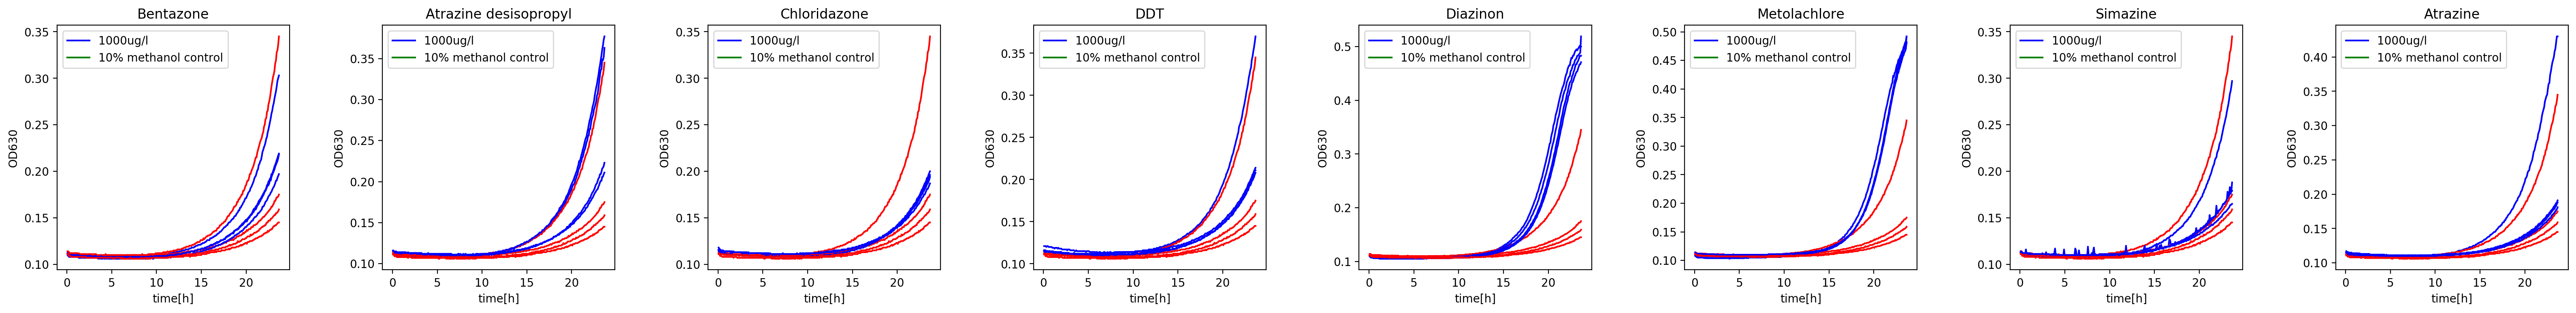

In [5]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
import matplotlib.pyplot as plt
import string

alph = string.ascii_uppercase
pesticides = ['Bentazone','Atrazine desisopropyl','Chloridazone','DDT','Diazinon','Metolachlore','Simazine','Atrazine']
control = [['A12','B12','C12','D12'],['A9','B9','C9','D9'],['E9','F9','G9','H9'],['G12','H12']]
fig, axs = plt.subplots(1,len(pesticides))
fig.set_figheight(4)
fig.set_figwidth(40)
for k in range(len(pesticides)):
    plt.sca(axs[k])
    plt.ylabel('OD630')
    plt.xlabel('time[h]')
    plt.title(pesticides[k])
    for j in range(4):
        plt.plot(df[alph[j]+str(k+1)],'b')
        plt.plot(df[control[1][j]],'r')
    plt.legend(['1000ug/l','10% methanol control'])
    leg = axs[k].get_legend()
    leg.legendHandles[0].set_color('b')
    leg.legendHandles[1].set_color('g')
plt.subplots_adjust(wspace=0.4)
plt.show()

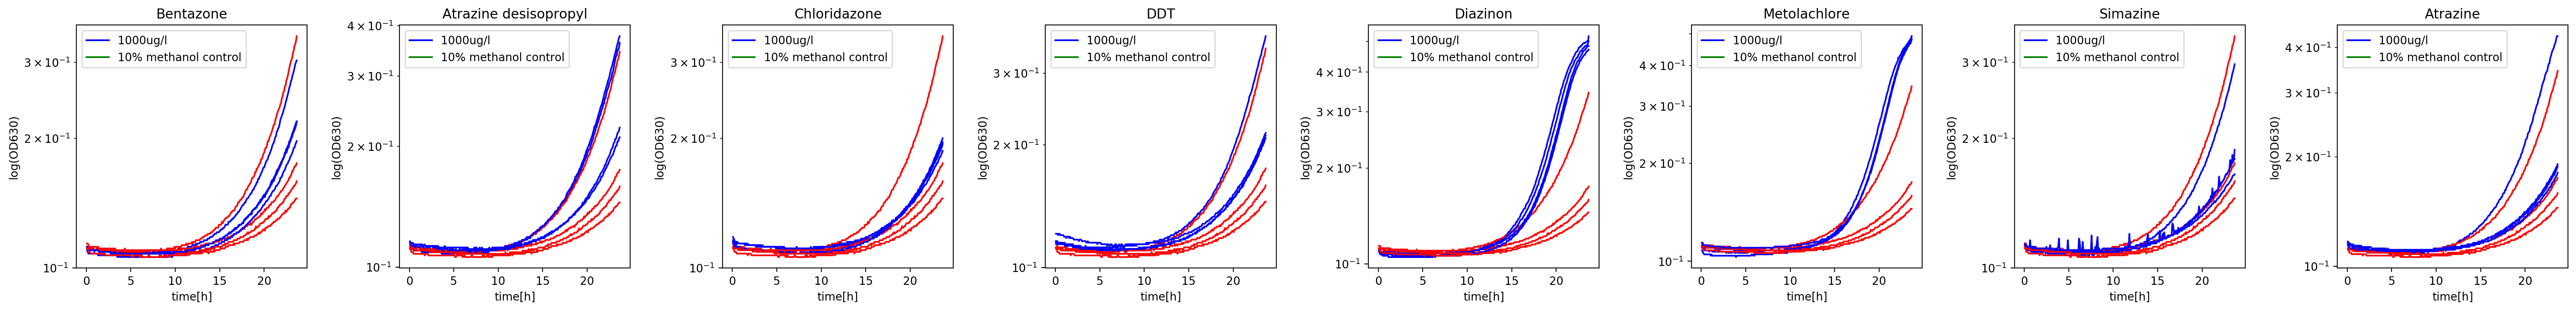

In [6]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
import matplotlib.pyplot as plt
import string

alph = string.ascii_uppercase
pesticides = ['Bentazone','Atrazine desisopropyl','Chloridazone','DDT','Diazinon','Metolachlore','Simazine','Atrazine']
control = [['A12','B12','C12','D12'],['A9','B9','C9','D9'],['E9','F9','G9','H9'],['G12','H12']]
fig, axs = plt.subplots(1,len(pesticides))
fig.set_figheight(4)
fig.set_figwidth(40)
for k in range(len(pesticides)):
    plt.sca(axs[k])
    plt.ylabel('log(OD630)')
    plt.xlabel('time[h]')
    plt.title(pesticides[k])
    for j in range(4):
        plt.semilogy(df[alph[j]+str(k+1)],'b')
        plt.semilogy(df[control[1][j]],'r')
    plt.legend(['1000ug/l','10% methanol control'])
    leg = axs[k].get_legend()
    leg.legendHandles[0].set_color('b')
    leg.legendHandles[1].set_color('g')
plt.subplots_adjust(wspace=0.4)
plt.show()

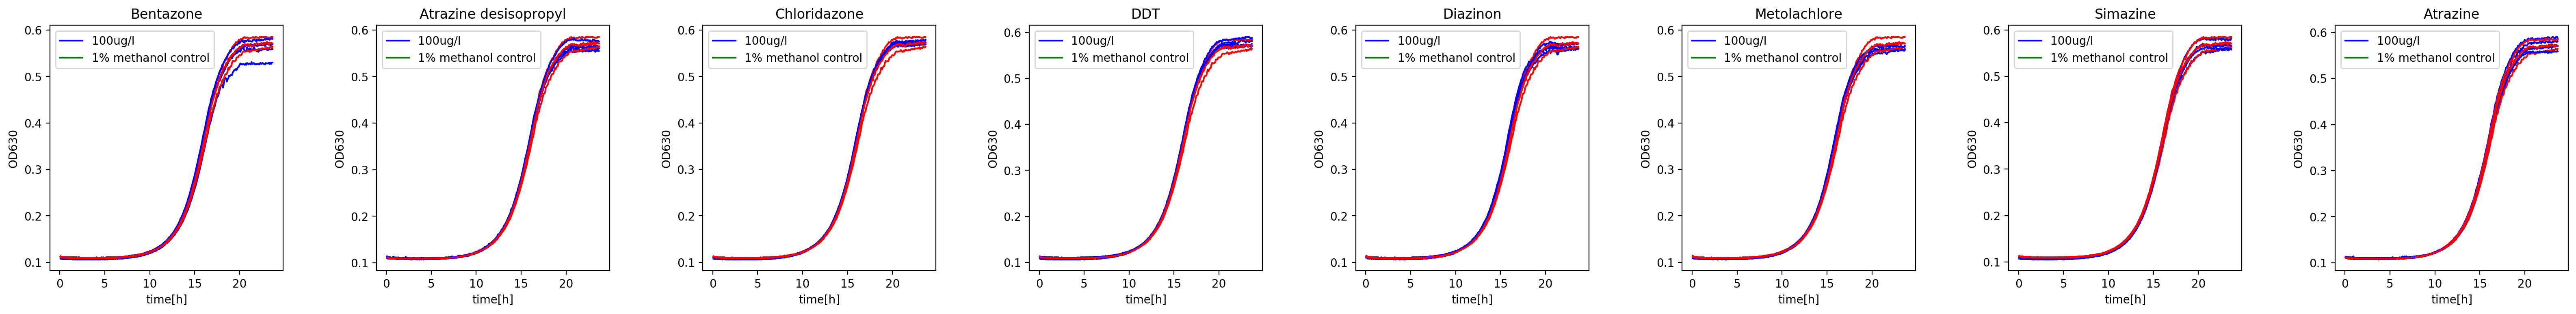

In [7]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
import matplotlib.pyplot as plt
import string

alph = string.ascii_uppercase
pesticides = ['Bentazone','Atrazine desisopropyl','Chloridazone','DDT','Diazinon','Metolachlore','Simazine','Atrazine']
control = [['A12','B12','C12','D12'],['A9','B9','C9','D9'],['E9','F9','G9','H9'],['G12','H12']]
fig, axs = plt.subplots(1,len(pesticides))
fig.set_figheight(4)
fig.set_figwidth(40)
for k in range(len(pesticides)):
    plt.sca(axs[k])
    plt.ylabel('OD630')
    plt.xlabel('time[h]')
    plt.title(pesticides[k])
    for j in range(4):
        plt.plot(df[alph[j+4]+str(k+1)],'b')
        plt.plot(df[control[2][j]],'r')
    plt.legend(['100ug/l','1% methanol control'])
    leg = axs[k].get_legend()
    leg.legendHandles[0].set_color('b')
    leg.legendHandles[1].set_color('g')
plt.subplots_adjust(wspace=0.4)
plt.show()

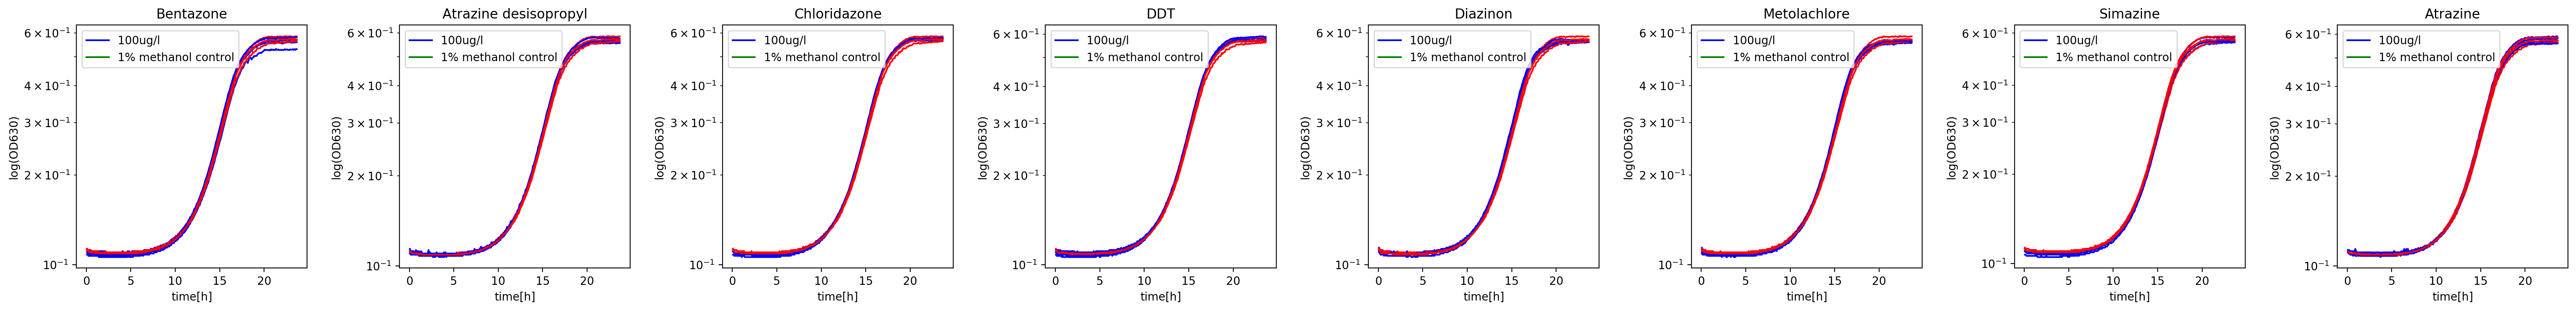

In [8]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
import matplotlib.pyplot as plt
import string

alph = string.ascii_uppercase
pesticides = ['Bentazone','Atrazine desisopropyl','Chloridazone','DDT','Diazinon','Metolachlore','Simazine','Atrazine']
control = [['A12','B12','C12','D12'],['A9','B9','C9','D9'],['E9','F9','G9','H9'],['G12','H12']]
fig, axs = plt.subplots(1,len(pesticides))
fig.set_figheight(4)
fig.set_figwidth(40)
for k in range(len(pesticides)):
    plt.sca(axs[k])
    plt.ylabel('log(OD630)')
    plt.xlabel('time[h]')
    plt.title(pesticides[k])
    for j in range(4):
        plt.semilogy(df[alph[j+4]+str(k+1)],'b')
        plt.semilogy(df[control[2][j]],'r')
    plt.legend(['100ug/l','1% methanol control'])
    leg = axs[k].get_legend()
    leg.legendHandles[0].set_color('b')
    leg.legendHandles[1].set_color('g')
plt.subplots_adjust(wspace=0.4)
plt.show()

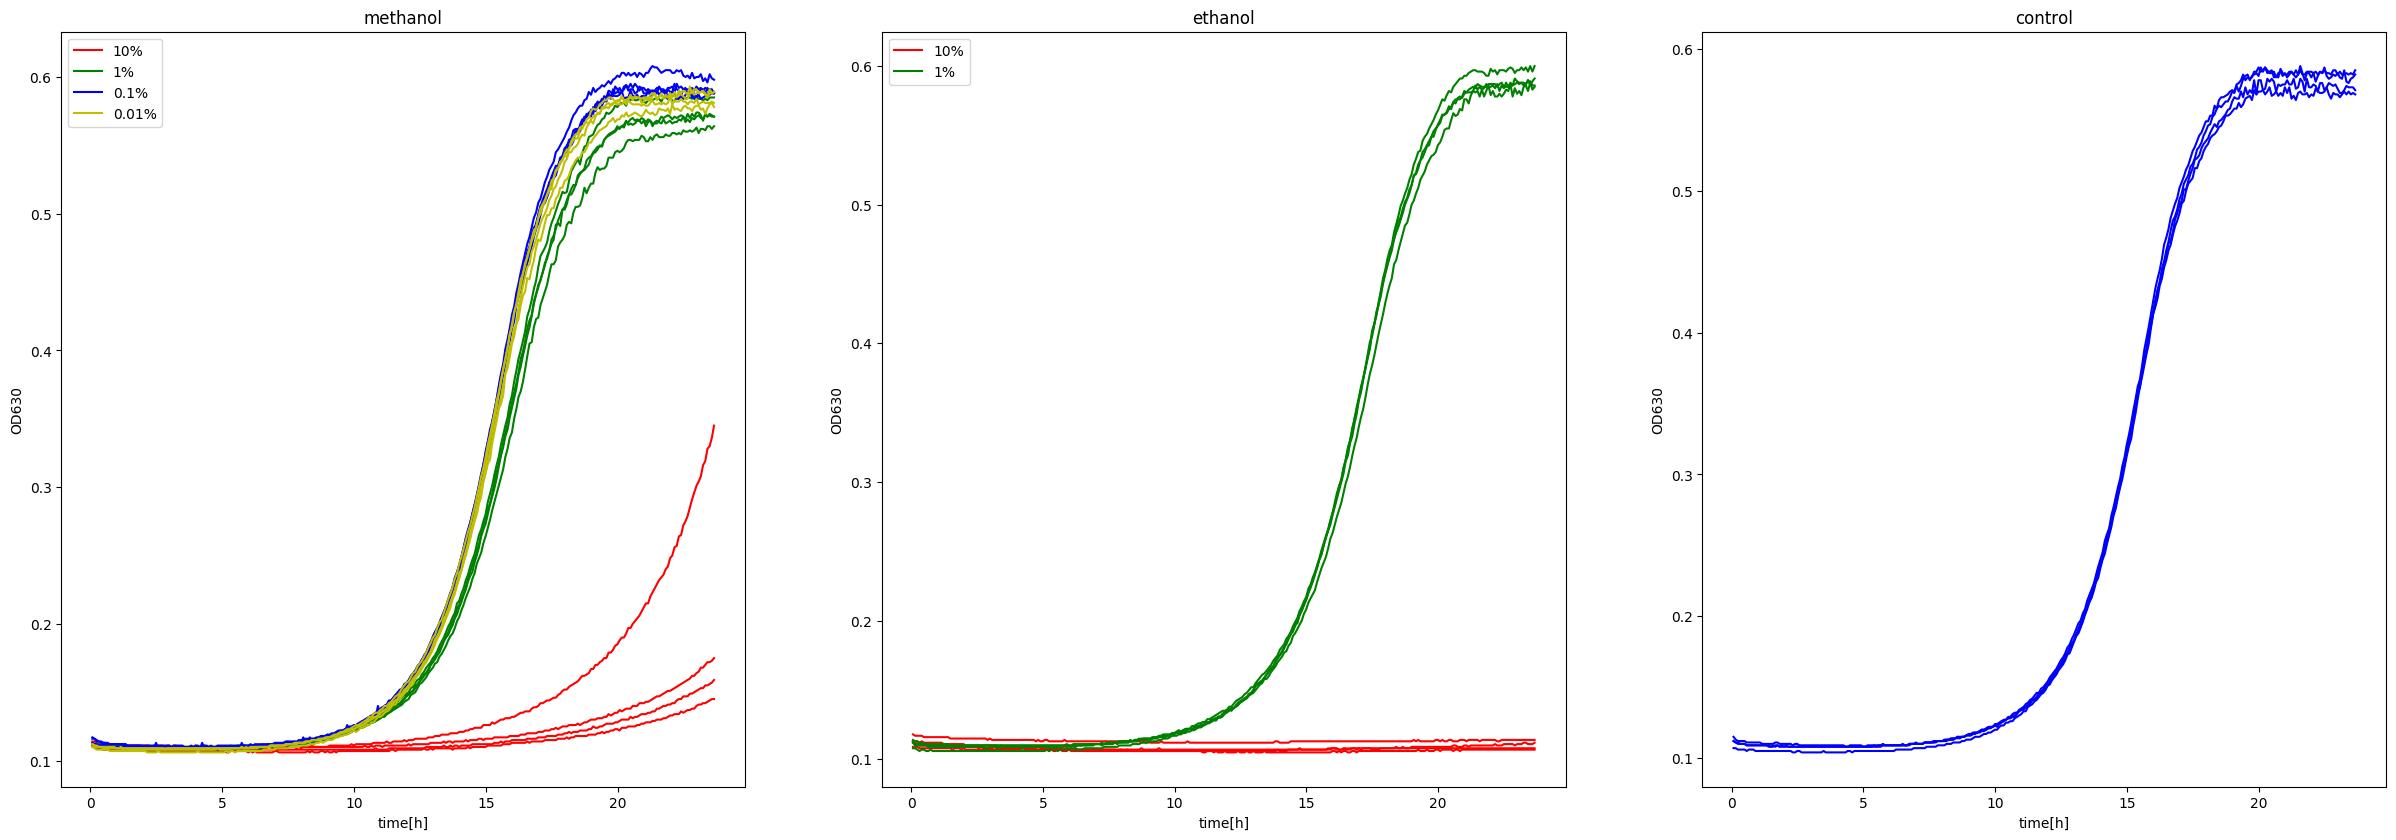

In [7]:
import matplotlib.pyplot as plt
import string

alph = string.ascii_uppercase
conc_meth = ['10%','1%','0.1%','0.01%']
conc_eth = ['10%','1%']
fig, axs = plt.subplots(1,3)
fig.set_figheight(10)
fig.set_figwidth(30)

plt.sca(axs[0])
plt.ylabel('OD630')
plt.xlabel('time[h]')
plt.title('methanol')
colors = ['r','g','b','y'] 
for i in range(len(conc_meth)):
    col = str(9 + (1 if i > 1 else 0))
    for k in range(4):
        row = alph[k+(4 if i % 2 != 0 else 0)]
        plt.plot(df[row+col],colors[i])
plt.legend(conc_meth)
leg = axs[0].get_legend()
for i in range(4):
    leg.legendHandles[i].set_color(colors[i])
    
plt.sca(axs[1])
plt.ylabel('OD630')
plt.xlabel('time[h]')
plt.title('ethanol')
colors = ['r','g']
for i in range(len(conc_eth)):
    col = str(11)
    for k in range(4):
        row = alph[k+(4 if i % 2 != 0 else 0)]
        plt.plot(df[row+col],colors[i])
plt.legend(conc_eth)
leg = axs[1].get_legend()
for i in range(2):
    leg.legendHandles[i].set_color(colors[i])

plt.sca(axs[2])
plt.ylabel('OD630')
plt.xlabel('time[h]')
plt.title('control')
for i in range(4):
    col = str(12)
    row = alph[i]
    plt.plot(df[row+col],'b')

plt.show()

## Fit

In [5]:
from scipy.optimize import curve_fit
def logistic(x,x0,y0,k,L):
    '''Logistic function'''
    return L/(1+np.exp(-k*(x-x0))) + y0

def get_fit(df,col,init_vals):
    '''Fit the logistic model and get the best parameters'''
    t = np.array(df.index)
    od = np.array(df[col],dtype=float)
    try:
        best_vals, covar = curve_fit(logistic, t, od, p0=init_vals)
        return best_vals
    except:
        return [0,0,0,0]

In [6]:
import string

alph = string.ascii_uppercase
#estimating k for wildtype
k_control = []
for i in range(4):
    col = str(9)
    row = alph[i+4]
    fit = get_fit(df,(row+col),[12.5,0.3,1,0.8])
    k_control.append(fit[2])
k_control

[0.7236290390369009,
 0.7272920133868996,
 0.7082313815599767,
 0.7289903698059683]

In [8]:
from scipy.stats import ttest_ind
print('t-test (alpha=0.05) for the growth rate k at 100ug/l compared to methanol control (+ = significant difference in mean(k))')
pesticides = ['Bentazone','Atrazine desisoprpyl','Chloridazone','DDT','Diazinone','Metolachlore','Simazine','Atrazine']
for i in range(len(pesticides)):
    k = []
    for j in range(4):
        col = str(i+1)
        row = alph[j+4]
        fit = get_fit(df,(row+col),[12.5,0.3,1,0.8])
        k.append(fit[2])
    print(pesticides[i], '+' if ttest_ind(k_control,k).pvalue < 0.05 else '-')

t-test (alpha=0.05) for the growth rate k at 100ug/l compared to methanol control (+ = significant difference in mean(k))
Bentazone +
Atrazine desisoprpyl +
Chloridazone -
DDT -
Diazinone +
Metolachlore +
Simazine -
Atrazine -


compare control of plate 5 and 6:

In [18]:
df5 = get_dataframe_from_xlsx('../data/202000808_iGEM2020-KO-Fitness-plate5.xlsx')
df6 = get_dataframe_from_xlsx('../data/202000809_iGEM2020-KO-Fitness-plate6.xlsx')
import string

alph = string.ascii_uppercase
#estimating k for wildtype
k5 = []
k6 = []
for i in range(4):
    col = str(9)
    row = alph[i+4]
    fit5 = get_fit(df5,(row+col),[12.5,0.3,1,0.8])
    fit6 = get_fit(df6,(row+col),[12.5,0.3,1,0.8])
    k5.append(fit5[2])
    k6.append(fit6[2])
(k5,k6)

([0.7524488525127498,
  0.7485027389741825,
  0.7405716930489187,
  0.7565709146636986],
 [0.7236290390369009,
  0.7272920133868996,
  0.7082313815599767,
  0.7289903698059683])

In [19]:
from scipy.stats import ttest_ind
ttest_ind(k5,k6)

Ttest_indResult(statistic=4.711271607494489, pvalue=0.0032875567477137334)

Interpretation: there is statistically significant evidence at the 5% level that the mean growth rate of the methanol control (concentration=1%) differs for WT and MSN2-.

[0.009987440769382627, 0.009669149604782268, 0.00571935357144171, 0.010139533727552164, 0.02053101786010869, 0.018267139675985034, 0.01783372480918033]


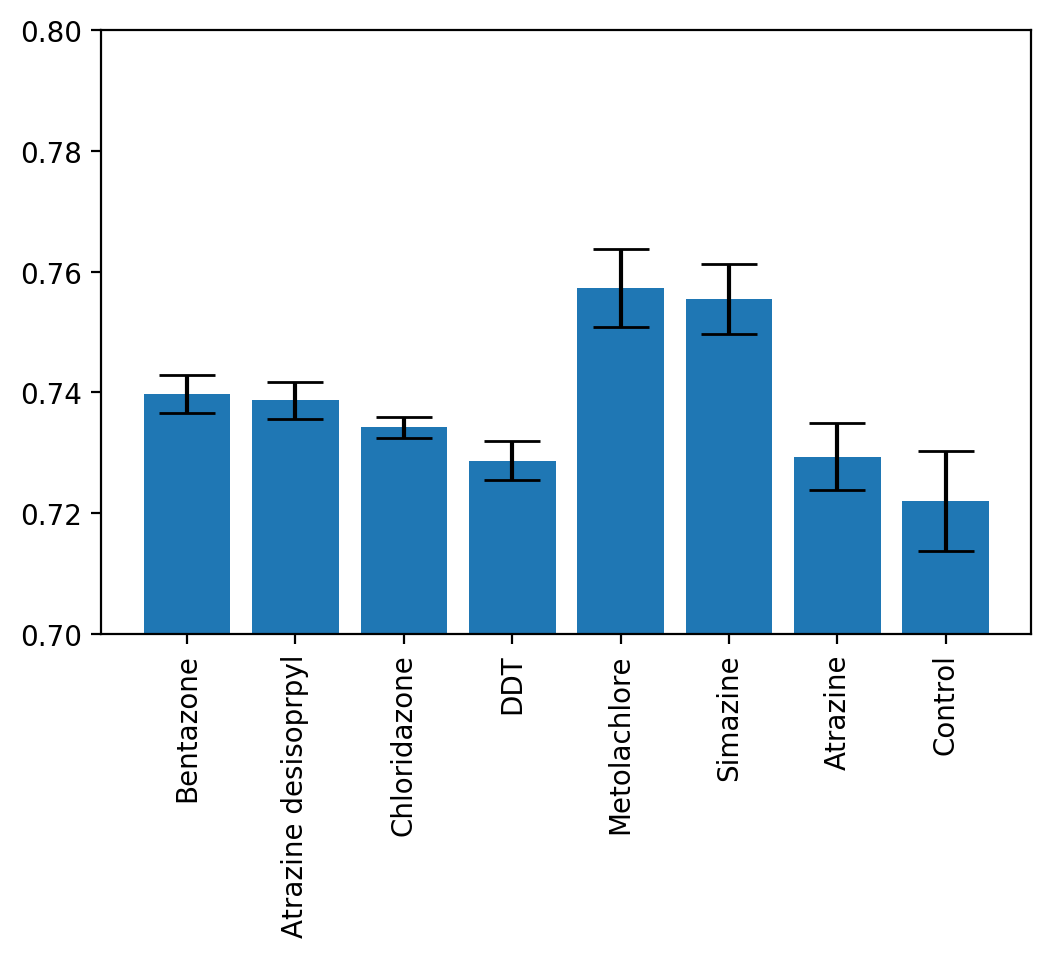

In [12]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
means = []
stds = []
errs = []
x_pos = np.arange(len(pesticides)+1)
for i in range(len(pesticides)):
    k = []
    for j in range(4):
        col = str(i+1)
        row = alph[j+4]
        fit = get_fit(df,(row+col),[12.5,0.3,1,0.8])
        k.append(fit[2])
    means.append(np.mean(k))
    stds.append(np.std(k)/2)
    a,b = t.interval(0.95,3,np.mean(k),np.std(k)/2)
    errs.append((b-a)/2)
print(errs)
k_control = []
for i in range(4):
    col = str(9)
    row = alph[i+4]
    fit = get_fit(df,(row+col),[12.5,0.3,1,0.8])
    k_control.append(fit[2])
a,b = t.interval(0.95,3,np.mean(k_control),np.std(k_control)/2)
errs.append((b-a)/2)
means.append(np.mean(k_control))
stds.append(np.std(k_control))
ax.bar(x_pos,means,yerr=stds,capsize=10)
plt.ylim(0.7,0.8)
ax.set_xticks(x_pos)
ax.set_xticklabels(pesticides+['Control'])
plt.xticks(rotation=90)
plt.show()

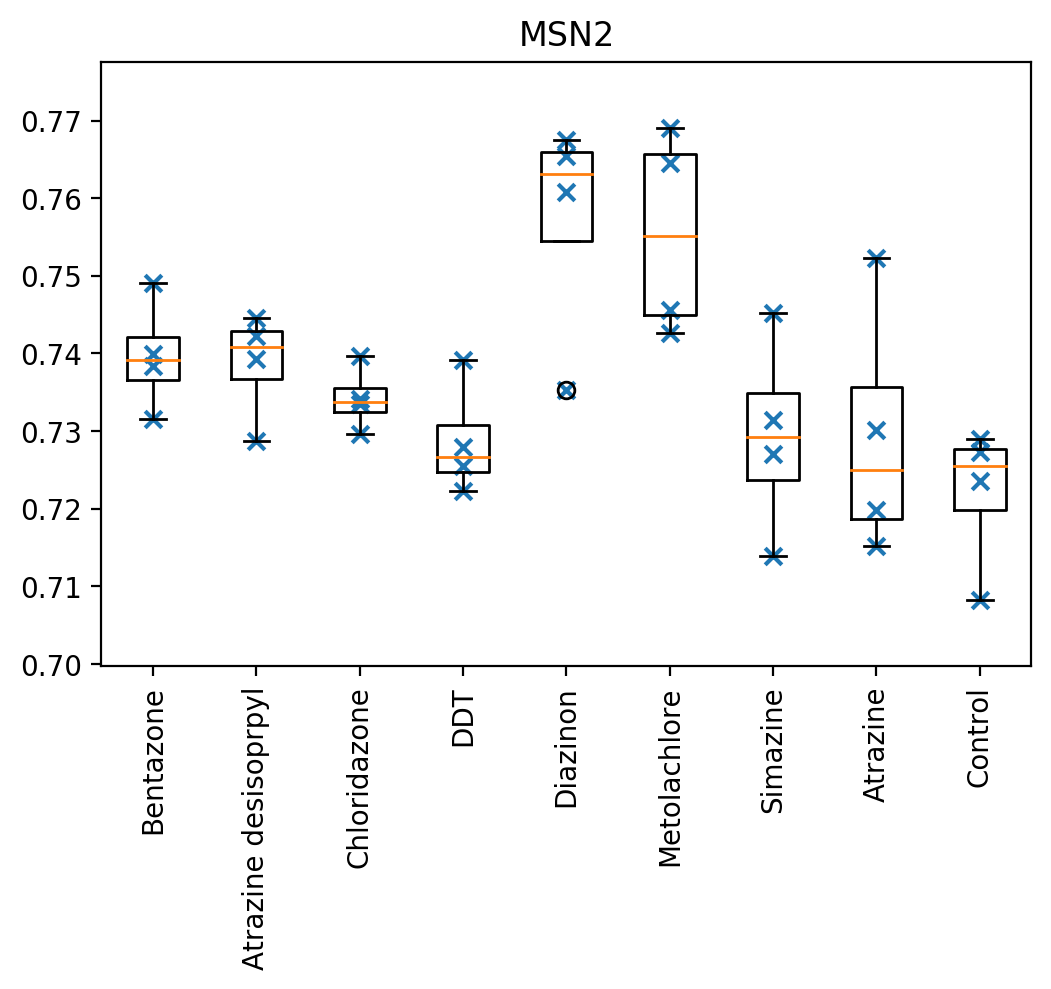

In [14]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
import sys
from scipy.optimize import curve_fit
import string
import matplotlib.pyplot as plt

try: df
except: sys.exit('Data not loaded!')
pesticides = ['Bentazone','Atrazine desisoprpyl','Chloridazone','DDT','Diazinon','Metolachlore','Simazine','Atrazine','Control']
alph = string.ascii_uppercase

def logistic(x,x0,y0,k,L):
    '''Logistic function'''
    return L/(1+np.exp(-k*(x-x0))) + y0

def get_fit(df,col,init_vals):
    '''Fit the logistic model and get the best parameters'''
    t = np.array(df.index)
    od = np.array(df[col],dtype=float)
    try:
        best_vals, covar = curve_fit(logistic, t, od, p0=init_vals)
        return best_vals
    except RuntimeError:
        return [0,0,0,0]

def getK(i,l):
    k = []
    for j in range(4):
        col = str(i+1)
        row = alph[l+j]
        fit = get_fit(df,(row+col),[13,0.3,0.7,0.8])
        k.append(fit[2])
    return k

K = [getK(i,4) for i in range(len(pesticides))]
x = [i//4+1 for i in range(len(pesticides)*4)]
fig, ax = plt.subplots()
plt.scatter(x,K,marker='x')
plt.boxplot(K)
ax.set_xticklabels(pesticides)
plt.xticks(rotation=90)
plt.title('MSN2')
plt.show()